# Gausiana Multivariada

Las funciones gausianas en N-dimensiones son muy útiles en estadística Bayesiana para definir probabilidades a priori.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['ggplot', 'demo.mplstyle'])

Primero definamos a mano una gausiana en 2D.

In [3]:
def gaussiana_2d(x, y, pars):
    mu_x, mu_y, sigma_x, sigma_y, rho = pars
    exp = np.exp(-1/(2 * (1-rho**2)) * (  (x - mu_x)**2 / sigma_x**2 
                                        + (y - mu_y)**2 / sigma_y**2 
                                        - (2 * rho * (x - mu_x) * (y - mu_y) 
                                           / (sigma_x * sigma_y))))
    output = exp / (2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2))
    return output

A continuación definamos los parámetros de la gausiana 2D que vamos a evaluar.

In [4]:
mu_x = 2.
mu_y = -1.
sigma_x = 0.5
sigma_y = 2.
rho = -0.5

pars = mu_x, mu_y, sigma_x, sigma_y, rho

Ahora podemos evaluar la gausiana. Los resultados de la evaluación los guardamos en un arreglo que llamamos `prior`.

In [5]:
x = np.arange(-1, 5, 0.1)
y = np.arange(-6, 4, 0.5)

prior = np.zeros((len(x), len(y)))

for i, x_i in enumerate(x):
    for j, y_j in enumerate(y):
        prior[i, j] = gaussiana_2d(x_i, y_j, pars)

El gráfico a continuación, muestra en escala de colores las densidades de probabilidad asociadas a cada punto.

La línea `ax.set_aspect('equal')` hace que el aspecto relativo del eje `x` y el eje `y` sean iguales. Esto es útil para una visualización apropiada. 

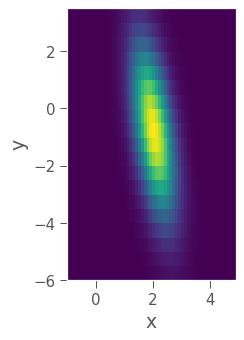

In [6]:
x_grid, y_grid = np.meshgrid(x, y, indexing='ij')

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.pcolormesh(x_grid, y_grid, prior)

plt.xlabel('x')
plt.ylabel('y');

Lo que acabamos de hacer se puede extender a N dimensiones pero se vuelve un poco engorroso. Además, la densidad de probabilidad gausiana ya está incluída en el paquete `scipy.stats`. A continuación veremos cómo utilizarla.

Para comparar directamente con nuestra implementación escrita a mano, vamos a re-implementar la misma gausiana 2D usando `scipy`.

Lo más importante es entender que `multivariate_normal` es una clase, que implementa variables aleatorias en N dimensiones. Una instancia de esa variable aleatoria tendrá métodos como `pdf` que nos permitirán evaluar la densidad de probabilidad.

In [7]:
from scipy.stats import multivariate_normal

A continuación definimos los parámetros que vamos a utilizar para nuestra variable aleatoria gausiana en 2D e inicializamos una instancia que llamamos `gauss_2d_rv`.

Si quisieramos que la gausiana fuera en más dimensiones, basta con darle las dimensiones correctas a los parámetros `mu` y `sigma`.

In [8]:
rho =  -0.5
mu = [mu_x, mu_y]
sigma = [[sigma_x**2             , rho * sigma_x * sigma_y],
         [rho * sigma_x * sigma_y,              sigma_y**2]]

gauss_2d_rv = multivariate_normal(mu, sigma)

La forma en que está implementada `multivariate_normal.pdf` requiere que se le entregue un set de posiciones en un formato específico. El ejemplo a continuación demuestra cómo hacerlo.

In [9]:
x_grid, y_grid

posiciones = np.empty(x_grid.shape + (2,))
posiciones[:, :, 0] = x_grid
posiciones[:, :, 1] = y_grid

prior_scipy = gauss_2d_rv.pdf(posiciones)

Finalmente podemos visualizar la gausiana que acabamos de calcular.

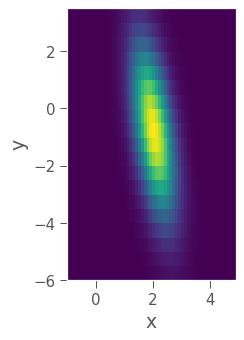

In [10]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.pcolormesh(x_grid, y_grid, prior_scipy)

plt.xlabel('x')
plt.ylabel('y');